### Nhiệm vụ 1: Xây dựng cây quyết định bằng thư viện Scikit-Learn

### Xây dựng cây quyết định và rừng cây với dữ liệu lấy từ https://www.kaggle.com/datasets/deceneu/default-of-credit-card-clients

In [4]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

### Nạp dữ liệu vào bộ nhớ, phân tích và loại bỏ những features không liên quan đến bài toán cần giải
quyết

In [5]:
df = pd.read_csv('dataset/default_of_credit_card_clients.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response
#variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### Chuẩn bị dữ liệu cho tập train và tập test

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree
#Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)

### Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [7]:
# the tree will grow to a depth of at most 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Độ chính xác của mô hình: 0.98


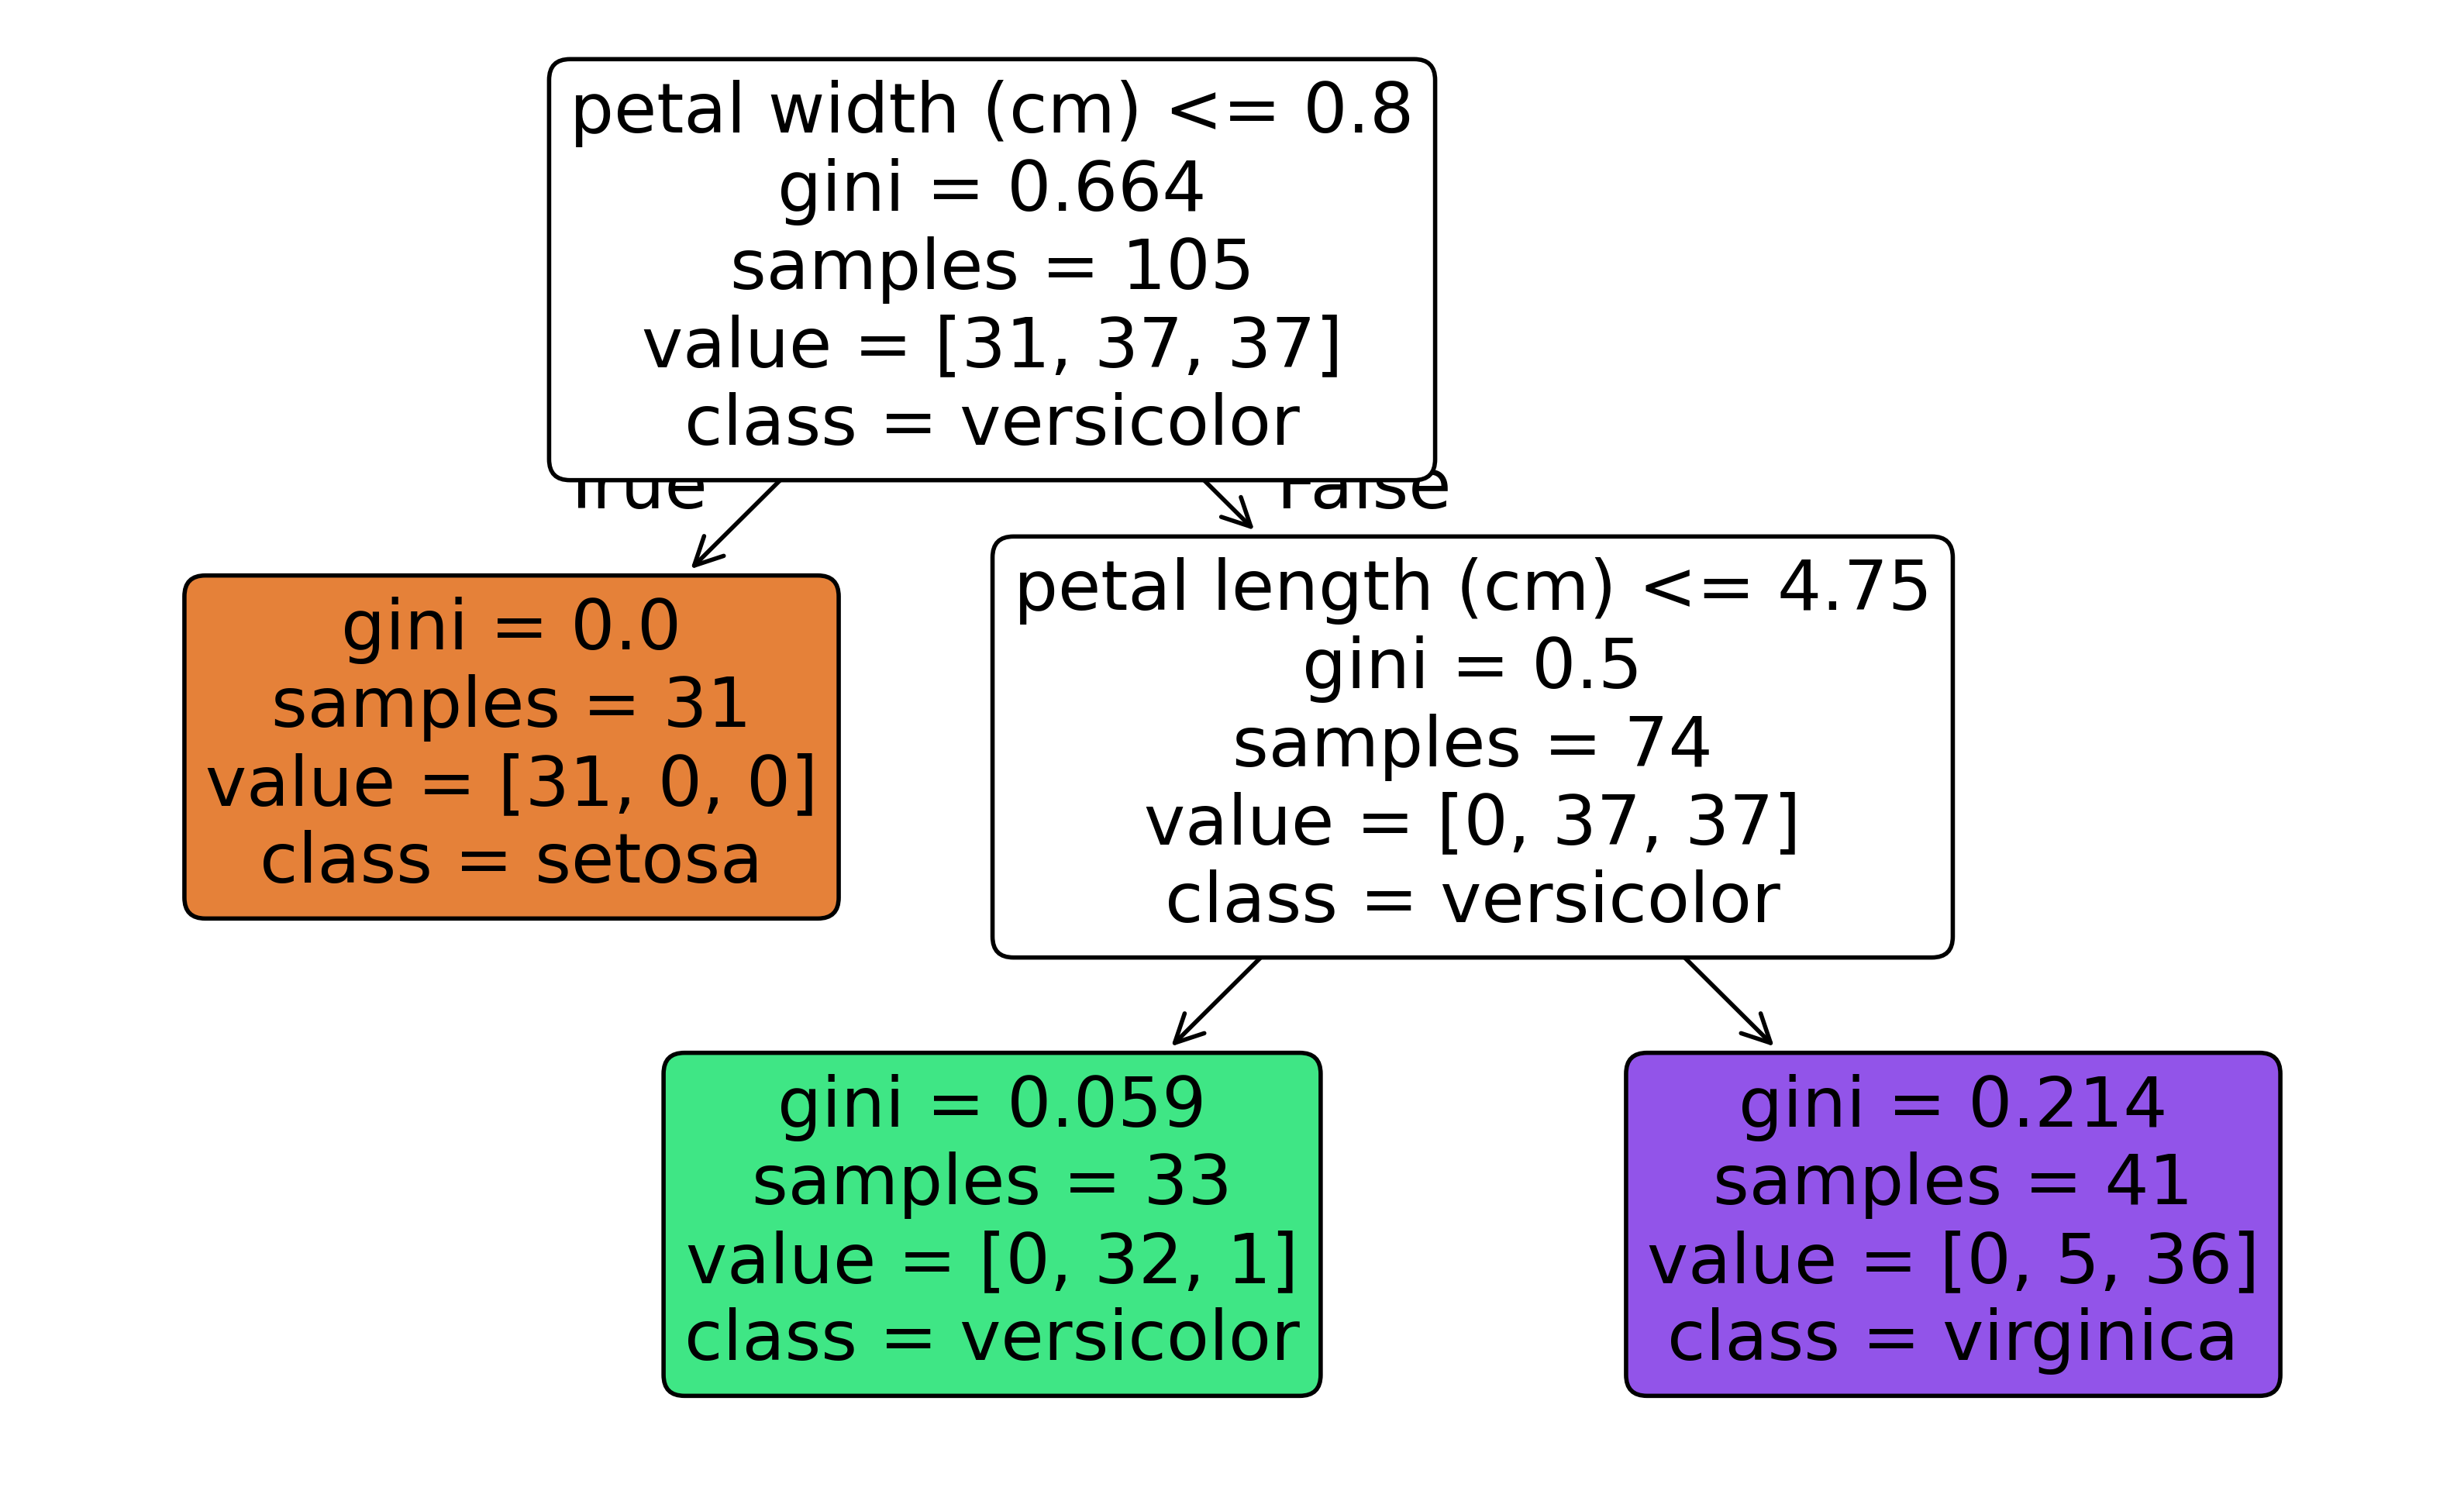

In [8]:
# 1️⃣ Import thư viện
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
df = pd.read_csv('dataset/default_of_credit_card_clients.csv') #Load the cleaned data

# 2️⃣ Tải dataset mẫu (Iris)
iris = load_iris()
X = iris.data          # Các đặc trưng (sepal length, sepal width, petal length, petal width)
y = iris.target        # Nhãn (loài hoa)

# 3️⃣ Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4️⃣ Tạo cây quyết định với độ sâu tối đa là 2
dt = tree.DecisionTreeClassifier(max_depth=2)

# 5️⃣ Huấn luyện mô hình
dt.fit(X_train, y_train)

# 6️⃣ Dự đoán trên tập test
y_pred = dt.predict(X_test)

# 7️⃣ Đánh giá độ chính xác
acc = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {acc:.2f}")

# 8️⃣ Vẽ cây quyết định
plt.figure(figsize=(10,6))
tree.plot_tree(
    dt,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.show()


### Hiển thị cây quyết định với package graphviz

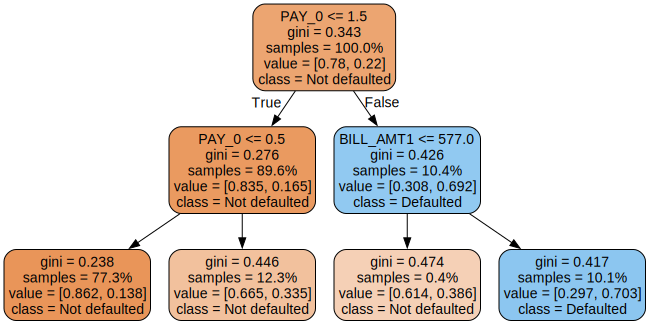

In [9]:
# Khi chia dữ liệu
X = df[features_response[:-1]]
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Huấn luyện
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

# Vẽ cây, truyền đúng tên cột
dot_data = tree.export_graphviz(dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=X_train.columns,  # ✅ Dùng cột thật
    proportion=True,
    class_names=['Not defaulted', 'Defaulted']
)
graph = graphviz.Source(dot_data)
graph


### ĐÁNH GIÁ MÔ HÌNH CÂY QUYẾT ĐỊNH

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dự đoán trên tập test
y_pred = dt.predict(X_test)

# In ra các chỉ số
print("=== ĐÁNH GIÁ MÔ HÌNH CÂY QUYẾT ĐỊNH ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nBáo cáo chi tiết:")
print(classification_report(y_test, y_pred, target_names=['Not defaulted', 'Defaulted']))

# Ma trận nhầm lẫn
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== ĐÁNH GIÁ MÔ HÌNH CÂY QUYẾT ĐỊNH ===
Accuracy: 0.8178333333333333

Báo cáo chi tiết:
               precision    recall  f1-score   support

Not defaulted       0.83      0.96      0.89      4643
    Defaulted       0.72      0.32      0.44      1357

     accuracy                           0.82      6000
    macro avg       0.77      0.64      0.67      6000
 weighted avg       0.80      0.82      0.79      6000


Confusion Matrix:
[[4470  173]
 [ 920  437]]


### Kết luận:

Mô hình Decision Tree hoạt động ổn với độ chính xác tổng thể cao (≈82%). Tuy nhiên, mô hình chưa tốt trong việc nhận diện các khách hàng “vỡ nợ” (recall thấp). Nguyên nhân có thể do dữ liệu mất cân bằng (số người không vỡ nợ nhiều hơn). Cần xem xét tăng độ sâu cây, chuẩn hóa dữ liệu, hoặc thử mô hình Random Forest để cải thiện khả năng phát hiện nhóm “vỡ nợ”.